In [178]:
# Manipulacao de dados e operacoes
import pandas as pd 
import numpy as np 
from numpy import median
from itertools import combinations
from sklearn.model_selection import train_test_split
import math

# Visualizacao
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

# Estatistica
from statistics import mean 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report    # output: accuracy, f1-score, recall e precision
from sklearn.metrics import confusion_matrix

# Modelos de regressao
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor

# Modelos de Classificação
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Outras bibliotecas de modelos
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.externals import joblib

# Nao-supervisionado
from sklearn.cluster import KMeans, DBSCAN

# Pre-processamento
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Outros
from datetime import datetime, timedelta
from scipy.special import expit
from scipy.io import arff
from sklearn.datasets import fetch_olivetti_faces, make_classification
from sklearn.datasets.samples_generator import make_blobs

# Preparando a base
---

In [179]:
# Lendo base de dados
url = "https://raw.githubusercontent.com/advinstai/aprendizagem-estatistica-agrupamento/master/exercicio/adult.csv.txt"
dados = pd.read_csv(url)

In [180]:
# dropando coluna education, porque ela ja esta codificada em "education-num"
dados.drop(['education'], axis=1, inplace=True)

In [181]:
# Codificando colunas categoricas
le = LabelEncoder()
dados['workclass'] = le.fit_transform(dados['workclass'])
dados['marital-status'] = le.fit_transform(dados['marital-status'])
dados['occupation'] = le.fit_transform(dados['occupation'])
dados['relationship'] = le.fit_transform(dados['relationship'])
dados['race'] = le.fit_transform(dados['race'])
dados['gender'] = le.fit_transform(dados['gender'])
dados['native-country'] = le.fit_transform(dados['native-country'])

In [182]:
# Separando dados X e y
X = dados.drop(['income'], axis=1).copy()
y = dados['income'].copy()

In [183]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
age                48842 non-null int64
workclass          48842 non-null int64
fnlwgt             48842 non-null int64
educational-num    48842 non-null int64
marital-status     48842 non-null int64
occupation         48842 non-null int64
relationship       48842 non-null int64
race               48842 non-null int64
gender             48842 non-null int64
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null int64
income             48842 non-null object
dtypes: int64(13), object(1)
memory usage: 5.2+ MB


In [184]:
X.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,4,226802,7,4,7,3,2,1,0,0,40,39
1,38,4,89814,9,2,5,0,4,1,0,0,50,39
2,28,2,336951,12,2,11,0,4,1,0,0,40,39
3,44,4,160323,10,2,7,0,2,1,7688,0,40,39
4,18,0,103497,10,4,0,3,4,0,0,0,30,39


### Quantidade de instancias de cada categoria na coluna "income"

In [185]:
dados['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

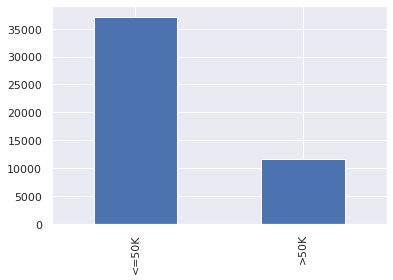

In [186]:
dados['income'].value_counts().plot.bar()

# Aplicando KMeans
---

In [187]:
# Relembrando quantidade de "<=50K" (1-True) e ">50K" (0-False) na base original:
dados['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [196]:
# Criando objeto do modelo KMeans
kmeans = KMeans(n_clusters=2)

# Treinando
treino = kmedias.fit_predict(X)

# Var temporaria guarda resultado do fit_predict com os labels corretos
resultado = pd.Series(treino).replace([0,1],["<=50K",">50K"])

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [198]:
# Quantidade de "<=50K" (1-True) e ">50K" (0-False) obtidos a partir do fit_predict
resultado.value_counts()

<=50K    36175
>50K     12667
dtype: int64

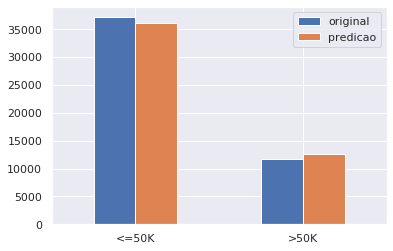

In [197]:
# Plotando original e predicao, lado a lado
original = dados['income'].value_counts()
predicao = resultado.value_counts()
df = pd.DataFrame({'original': original, 'predicao': predicao})
ax = df.plot.bar(rot=0)

In [199]:
# Salvando quantidade de acertos 
qtdAcertos = (resultado == dados.income).sum()
acuracia = round(qtdAcertos/pd.Series(treino).count()*100.0, 2)
print("Acuracia = {}%".format(acuracia))

Acuracia = 62.0%


In [201]:
# Printando o classification report
print(classification_report((dados.income == ">50K"), pd.Series(treino)))

              precision    recall  f1-score   support

       False       0.76      0.74      0.75     37155
        True       0.23      0.25      0.24     11687

    accuracy                           0.62     48842
   macro avg       0.49      0.49      0.49     48842
weighted avg       0.63      0.62      0.63     48842

